# Human Cell Lines: single cell PCHA

In [8]:
# import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import dropkick as dk
# make sure to use position 1
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb
import cellrank as cr
import scanorama
from scipy.spatial.distance import squareform
from scipy.sparse import issparse, csr_matrix, find
from scipy.spatial.distance import pdist
from py_pcha import PCHA

In [2]:
adata = sc.read_h5ad('../../out/cell-lines/adata_dk_01.h5ad')

## Read in Files

In [2]:
indir = "../../data/single-cell-rna-seq/Human-cell-lines/"

samples =["2637-1-DMS454","2637-2-CORL279","2637-3-H1048","2638-1-H82","2638-2-H69","2638-4-H841","2639-1-H524","2639-2-DMS53"]
[a1,a2,a3,a4,a5,a6,a7, a8] = [mb.pp.read_loom(sample, indir) for sample in samples]


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD113-1', 'SNORD113-2']
  + str(example_colliding_values)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Ex

In [3]:
tfs = ['SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
      'CHGA','EPCAM']


## Dropkick

In [10]:
batch_categories = ["DMS454","CORL279","H1048","H82","H69","H841","H524","DMS53"]
batch_key = 'cline'

adatas = [a1,a2,a3,a4,a5,a6,a7,a8] 


adata = mb.pp.dropkick_recipe(adatas, verbose=False, filter=False, batch_categories = batch_categories, batch_key = batch_key,
                                                X_final = 'log1p_norm',plot = False, n_hvgs=None,
                                                retain_genes=tfs)


Running dropkick on each sample and filtering...
Chosen lambda value:
	[0.05393782]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.02565323]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.03505034]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.036478]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.10863844]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.04689123]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.02251933]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.02150734]
Assigning scores and labels
Done!

AnnData object with n_obs × n_vars = 86492 × 63677
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841'
    layers: 'ambig

In [11]:
adata

AnnData object with n_obs × n_vars = 86349 × 22475
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'raw_counts

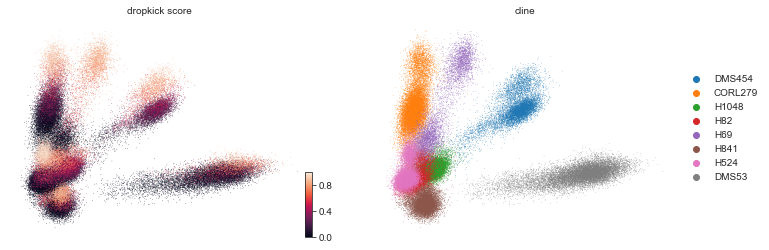

In [14]:
scv.pl.pca(adata, color = ['dropkick_score','cline'], legend_loc = 'on right')

In [15]:
scv.pp.neighbors(adata, random_state=0)
scv.tl.umap(adata, random_state=0)

computing neighbors
    finished (0:00:30) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


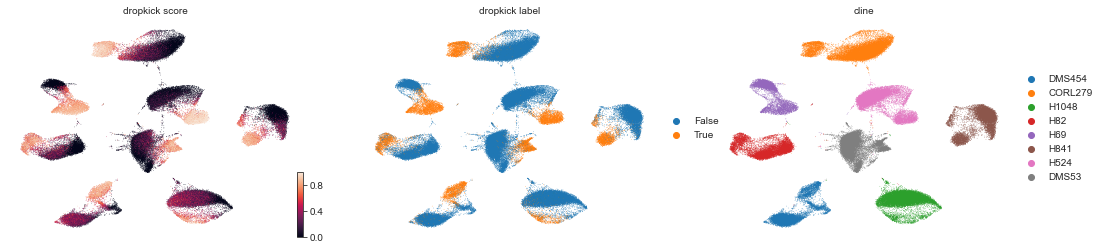

In [25]:
scv.pl.umap(adata, color = ['dropkick_score','dropkick_label','cline'], legend_loc = 'on right')

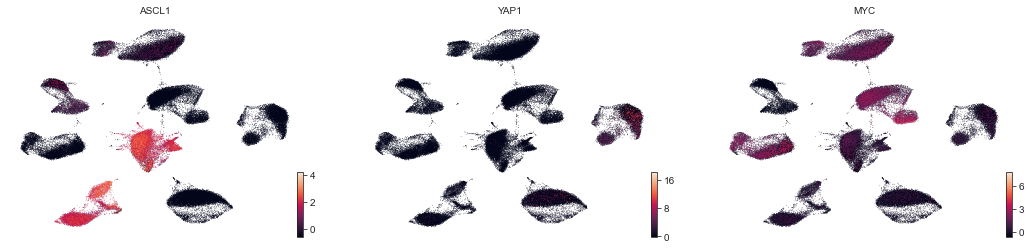

In [19]:
scv.pl.umap(adata, color = ['ASCL1','YAP1','MYC'], legend_loc = 'on right')

In my dropkick recipe, setting filter = False will add the dropkick labels/scores to adata but does not actually filter any cells or genes. It **will** filter cells and genes based on scanpy's and scvelo's functions:
`sc.pp.filter_cells(adata, min_genes=min_genes);
scv.pp.filter_genes(adata, min_counts=min_counts, retain_genes=retain_genes)`


In [31]:
adata_dk = adata[adata.obs.dropkick_label=='True'].copy() #if this throws an error or gives 0 cells, try ==1 or == True

In [32]:
scv.pp.pca(adata_dk, random_state=0)

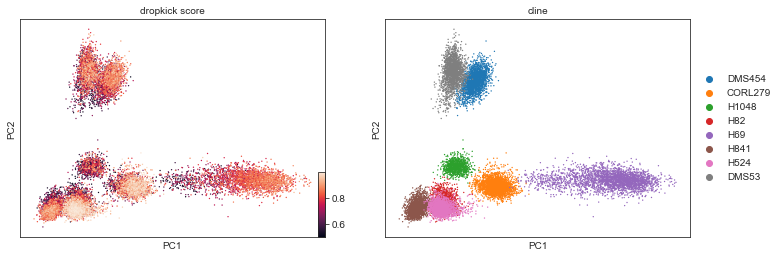

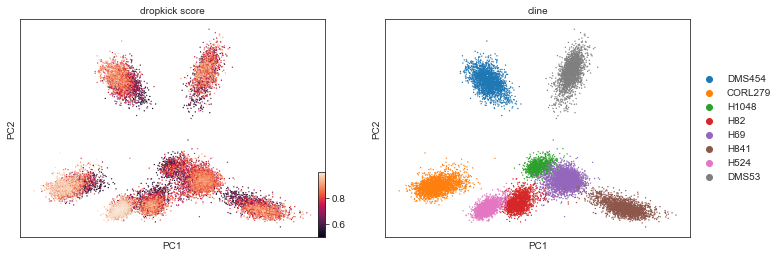

In [45]:
scv.pl.pca(adata_dk, color = ['dropkick_score','cline'], legend_loc = 'on right', components="1,2", frameon=True)
scv.pl.pca(adata_dk, color = ['dropkick_score','cline'], legend_loc = 'on right', components="3,2", frameon = True)

In [34]:
scv.pp.neighbors(adata_dk, random_state=0)
scv.tl.umap(adata_dk, random_state=0)

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


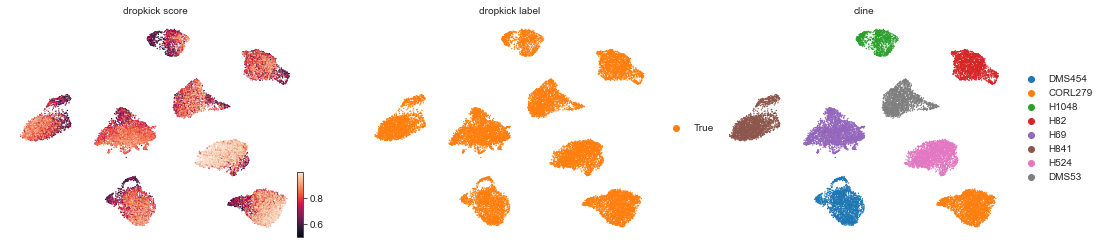

In [36]:
scv.pl.umap(adata_dk, color = ['dropkick_score','dropkick_label','cline'], legend_loc = 'on right')

In [37]:
adata_dk.write_h5ad('../../out/cell-lines/adata_dk_01.h5ad')

In [18]:
a1 = adatas.pop(0)
adata = a1.concatenate(adatas, batch_key=batch_key, batch_categories=batch_categories)

In [21]:
verbose = False,
n_hvgs = 2000,
min_genes = 100,
min_counts = 3,
retain_genes = tfs
mito_names="^mt-|^MT-"
n_ambient=10
target_sum=None
batch_categories = batch_categories
batch_key = batch_key                                         
X_final = 'log1p_norm'

In [22]:
orig_shape = adata.shape

# store raw counts before manipulation
adata.layers["raw_counts"] = adata.X.copy()

#filter cells and genes
sc.pp.filter_cells(adata, min_genes=min_genes)
scv.pp.filter_genes(adata, min_counts=min_counts, retain_genes=retain_genes)
if verbose:
    if adata.shape[0] != orig_shape[0]:
        print(
            "Ignoring {} barcodes with less than {} genes detected".format(
                orig_shape[0] - adata.shape[0], min_genes
            )
        )
    if adata.shape[1] != orig_shape[1]:
        print(
            "Ignoring {} genes with zero total counts".format(
                orig_shape[1] - adata.shape[1]
            )
        )
adata.obs.drop(columns=["n_genes"], inplace=True)
print(adata)


Filtered out 41202 genes that are detected (3,) counts (spliced).
Ignoring 143 barcodes with less than (100,) genes detected
Ignoring 41202 genes with zero total counts
AnnData object with n_obs × n_vars = 86349 × 22475
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'raw_counts'


In [23]:

# identify mitochondrial genes
adata.var["mito"] = adata.var_names.str.contains(mito_names)
# identify putative ambient genes by lowest dropout pct (top n_ambient)
adata.var["pct_dropout_by_counts"] = np.array(
    (1 - (adata.X.astype(bool).sum(axis=0) / adata.n_obs)) * 100
).squeeze()
lowest_dropout = adata.var.pct_dropout_by_counts.nsmallest(n=n_ambient).min()
highest_dropout = adata.var.pct_dropout_by_counts.nsmallest(n=n_ambient).max()
adata.var["ambient"] = adata.var.pct_dropout_by_counts <= highest_dropout
# reorder genes by dropout rate
adata = adata[:, np.argsort(adata.var.pct_dropout_by_counts)].copy()
if verbose:
    print(
        "Top {} ambient genes have dropout rates between {} and {} percent:\n\t{}".format(
            len(adata.var_names[adata.var.ambient]),
            round(lowest_dropout, 3),
            round(highest_dropout, 3),
            adata.var_names[adata.var.ambient].tolist(),
        )
    )
# calculate standard qc .obs and .var
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mito", "ambient"], inplace=True, percent_top=None
)


# other arcsinh-transformed metrics
adata.obs["arcsinh_total_counts"] = np.arcsinh(adata.obs["total_counts"])
adata.obs["arcsinh_n_genes_by_counts"] = np.arcsinh(
    adata.obs["n_genes_by_counts"]
)

# normalize counts before transforming
sc.pp.normalize_total(adata, target_sum=target_sum, layers=None, layer_norm=None)
adata.layers["norm_counts"] = adata.X.copy()


Top 10 ambient genes have dropout rates between 0.727 and 4.87 percent:
	['MT-ND4', 'MT-ND3', 'MT-CO3', 'RPS19', 'MT-RNR2', 'MT-ND1', 'MT-ND2', 'MT-ATP6', 'MT-CYB', 'HIST1H4C']


In [26]:
# adata.layers["log1p_norm"] = adata.X.copy()  # save to .layers
sc.pp.highly_variable_genes(
    adata, n_top_genes=2000, n_bins=20, flavor="seurat"
)
adata.var.drop(columns=["dispersions", "dispersions_norm"], inplace=True)
# arcsinh-transform normalized counts (adata.layers["arcsinh_norm"])
adata.X = np.arcsinh(adata.layers["norm_counts"])
sc.pp.scale(adata)  # scale genes for feeding into model ############ If there is a discrepancy with scanpy recipe, this might be why
adata.layers[
    "arcsinh_norm"
] = adata.X.copy()  # save arcsinh scaled counts in .layers

adata.X = np.log1p(adata.layers["norm_counts"])
sc.pp.scale(adata)  # scale genes for feeding into model
adata.layers[
    "log1p_norm"
] = adata.X.copy()  # save log1p scaled counts in .layers

# remove unneeded stuff
del adata.layers["norm_counts"]

# set .X as desired for downstream processing; default raw_counts
if (X_final != "raw_counts") & verbose:
    print("Setting {} layer to .X".format(X_final))
adata.X = adata.layers[X_final].copy()

scv.tl.score_genes_cell_cycle(adata)
sc.tl.pca(adata, n_comps=50, use_highly_variable=True)

In [3]:
# sc.tl.pca(adata)
# sc.pl.pca(adata, color = 'cline')

In [4]:
# sc.pp.neighbors(adata, random_state=0)
# sc.tl.umap(adata, random_state=0)
# sc.pl.umap(adata, color = 'cline')

In [5]:
# mb.pp.scanorama_recipe(adata, groups = 'cline', correct = True, basis = 'umap')

In [5]:
# mb.pp.scanpy_recipe(adata_full, retain_genes=tfs)


Filtered out 45412 genes that are detected in less than 3 cells (spliced).
Normalized count data: X, spliced, unspliced.
Logarithmized X.


AnnData object with n_obs × n_vars = 16671 × 18265
    obs: 'cline', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr'
    uns: 'cline_colors'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [6]:
# adata_check = adata_full.copy()

In [9]:
# adata_check.X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Integration using scanorama

In [6]:
adata = sc.read_h5ad('../../out/cell-lines/adata_dk_01.h5ad')

We'll use scanorama's umap to visualize the data. Scanorama has been updated since I first wrote this code, so I updated it appropriately. Now, we split adata into batches and give the list of adatas to scanorama.correct_scanpy. `corrected` is a new list of adatas where X is the corrected data and `corrected[0].obsm['X_scanorama']` has the integrated data for dimensionality reduction. I can then use the integrated data to find nearest neighbors and run umap, or run a PCA on the corrected data X. 
```
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.tl.leiden(adata_spatial, key_added="clusters")
```

In [47]:
# mb.pp.scanorama_recipe(adata_dk, groups = 'cline', correct = True, basis = 'umap')
#updated scanorama 1.7 broke this function because it only returns one value instead of a two-tuple for correct_scanpy

In [24]:
batches = sorted(adata.obs['cline'].cat.categories)

alldata = {}
for batch in batches:
    print(batch)
    alldata[batch] = adata[adata.obs['cline'] == batch,]

# convert to list of AnnData objects
adatas = list(alldata.values())
corrected = scanorama.correct_scanpy(adatas, return_dimred=True)
for i in corrected:
    print(i.obs['cline'][0])

CORL279
DMS454
DMS53
H1048
H524
H69
H82
H841
Found 22475 genes among all datasets
[[0.         0.10313901 0.         0.04636459 0.00085288 0.01643444
  0.01110462 0.00048473]
 [0.         0.         0.10114599 0.03477345 0.         0.00149477
  0.00058445 0.        ]
 [0.         0.         0.         0.09799789 0.         0.
  0.         0.01696558]
 [0.         0.         0.         0.         0.00105374 0.00842993
  0.06638567 0.15068493]
 [0.         0.         0.         0.         0.         0.
  0.2226768  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.04441847 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.11972855]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (4, 6)
Processing datasets (3, 7)
Processing datasets (6, 7)
Processing datasets (0, 1)
Processing datasets (1, 2)
CORL279
DMS454
DMS53
H1048
H524
H69
H82
H841


Now `corrected.X` can be added to adata as a new layer `corrected`, and `corrected.obsm['X_scanorama']` can be added to `adata.obsm`.

In [86]:
#if you rerun this, it **will** pop off another adata and you will have removed a cell line!!
#if you do, use this before rerunning: 
#corrected = [first, corrected[0],corrected[1],corrected[2],corrected[3],corrected[4],corrected[5],corrected[6]]

first = corrected.pop(0)
adata_SC = first.concatenate(corrected, batch_key='cline',
                                            batch_categories=batches)

In [44]:
adata.layers['corrected'] = adata_SC.X
adata.obsm['X_scanorama'] = adata_SC.obsm['X_scanorama']

In [52]:
#del adata_SC

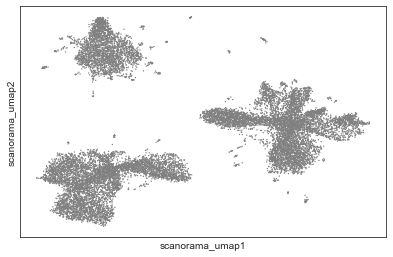

In [48]:
sc.pp.neighbors(adata, use_rep="X_scanorama", key_added='scanorama_neighbors')
tmp = sc.tl.umap(adata, neighbors_key='scanorama_neighbors', random_state=0, copy=True)
adata.obsm['X_scanorama_umap'] = tmp.obsm['X_umap']
del tmp
sc.pl.scatter(adata, basis='scanorama_umap')

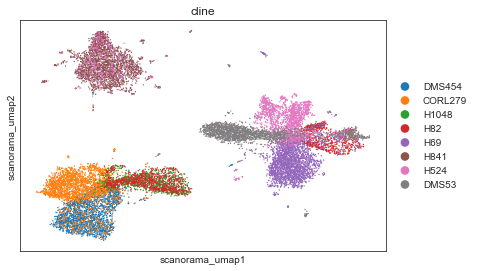

In [49]:
sc.pl.scatter(adata, basis='scanorama_umap', color='cline')

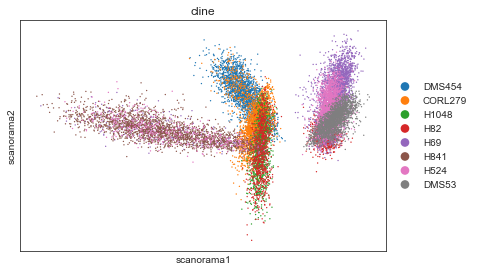

In [50]:
sc.pl.scatter(adata, basis='scanorama', color='cline')

Honestly, this looks weird. I need to doublecheck the cell lines are being assigned correctly because scanorama first matches H82 and H524, and those are no where near each other.

I am not sure if I should correct for cell cycle before running magic, so I will try both ways and look at the final results.

## MAGIC-- used for archetype analysis

Because we filtered out the dropkick cells after filtering cells and genes with scanpy, we need to doublecheck that all of the genes are actually expressed in the dataset, so we'll do a small filter to get rid of any genes we missed.

In [54]:
sc.pp.filter_genes(adata, min_cells=3)

In [55]:
import magic
# import pandas as pd
# import matplotlib.pyplot as plt
magic_operator = magic.MAGIC(solver='approximate')
X_magic = magic_operator.fit_transform(adata)


Calculating MAGIC...
  Running MAGIC on 16108 cells and 20446 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 8.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 30.30 seconds.
    Calculating affinities...
    Calculated affinities in 28.56 seconds.
  Calculated graph and diffusion operator in 67.48 seconds.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 71.47 seconds.


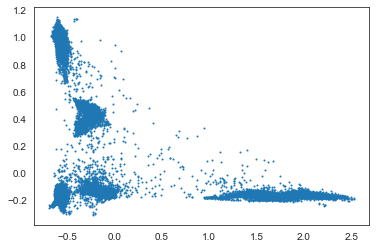

In [57]:
plt.scatter(X_magic.obs_vector('ASCL1'), X_magic.obs_vector('NEUROD2'),  s=1, cmap='inferno')


In [71]:
sc.pp.pca(X_magic)

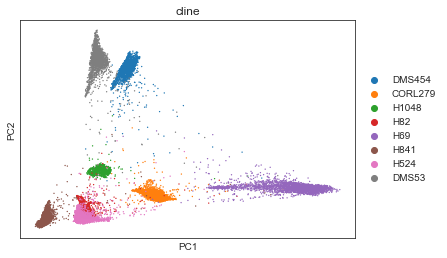

In [72]:
sc.pl.pca(X_magic, color='cline')

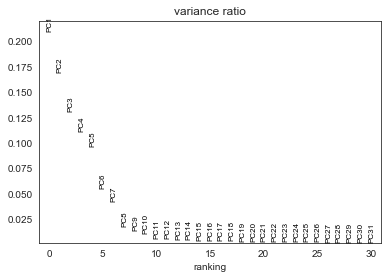

In [102]:
sc.pl.pca_variance_ratio(X_magic)

In [ ]:
pca_var = X_magic.uns['pca']['variance_ratio']

tot_exp_var = 0
n = 0
for i in pca_var:
    n +=1
    tot_exp_var += i
    if tot_exp_var > .9: 
        print(n)
        break

In [ ]:
def Cumulative(lists):
    cu_list = []
    length = len(lists)
    cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)]
    return cu_list[1:]
 
lists = pca_var
print(Cumulative(lists))

## MAGIC

In [55]:
import magic
# import pandas as pd
# import matplotlib.pyplot as plt
magic_operator = magic.MAGIC(solver='approximate')
X_magic = magic_operator.fit_transform(adata)


Calculating MAGIC...
  Running MAGIC on 16108 cells and 20446 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 8.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 30.30 seconds.
    Calculating affinities...
    Calculated affinities in 28.56 seconds.
  Calculated graph and diffusion operator in 67.48 seconds.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 71.47 seconds.


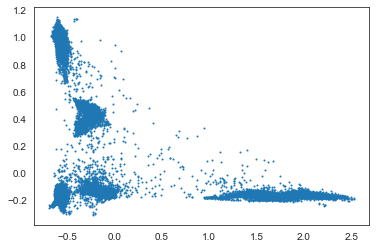

In [57]:
plt.scatter(X_magic.obs_vector('ASCL1'), X_magic.obs_vector('NEUROD2'),  s=1, cmap='inferno')


In [71]:
sc.pp.pca(X_magic)

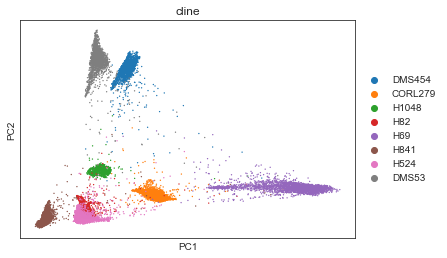

In [72]:
sc.pl.pca(X_magic, color='cline')

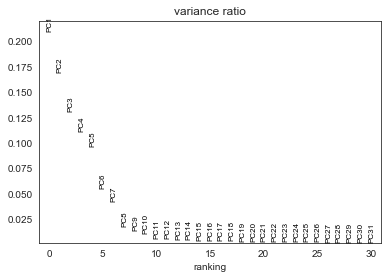

In [102]:
sc.pl.pca_variance_ratio(X_magic)

In [376]:
pca_var = X_magic.uns['pca']['variance_ratio']
var_explained = .85
tot_exp_var = 0
n = 0
for i in pca_var:
    n +=1
    tot_exp_var += i
    if tot_exp_var > var_explained: 
        print(n+1, "PCs explain at least", var_explained*100, "percent of the variance")
        break

11 PCs explain at least 85.0 percent of the variance


In [351]:
def cumulative(var):
    cum_var = []
    tot_sum = 0
    for i in var:
        tot_sum += i
        cum_var.append(tot_sum)
    return cum_var


In [360]:
cum_var[7]

0.834827110171318

In [363]:
def find_knee_varexpl(cum_var):
    farthestk = 0
    for i in range(50):
        #find distance of point p3 from line between p1 and p2
        p1=np.array([0,cum_var[0]])
        p2=np.array([49,cum_var[49]])
        p3=np.array([i,cum_var[i]])
        k = (np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))

        #knee is farthest away from line between p1 and p2
        if k > farthestk: 
            farthestk = k
            knee = i
    return knee +1 # number of components is 1 more than index
cum_var = cumulative(pca_var)
print("Knee of EV vs PC plot: ",find_knee_varexpl(cum_var))

Knee of EV vs PC plot:  8


In [338]:
X_magic.write_h5ad('../../out/cell-lines/X_magic_01.h5ad')

# PCHA on MAGIC imputed data

In [147]:
!pip install py_pcha

In [3]:
X_magic = sc.read_h5ad('../../out/cell-lines/X_magic_01.h5ad')

## Full PCA with 50 components
Running PCHA on the full PCA (50 components)-- the variance explained here is the proportion of the variance in the full 50 components.

In [334]:
ev_per_arc = []
for i in range(3,11):
    XC, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=i, delta=0.1)
    ev_per_arc.append(varexpl)
    print(varexpl)


0.3872691546198974
0.5125655698414989
0.635349835670247
0.6809363520081192
0.7862524131118132
0.7962033115013463
0.8535568843289678
0.8679398132096332


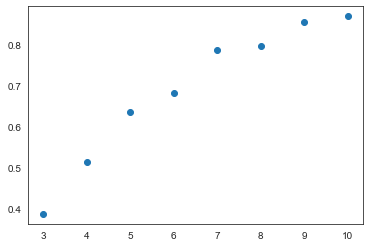

In [335]:
plt.scatter(x = [3,4,5,6,7,8,9,10], y = ev_per_arc)

In [336]:
def find_knee(ev_per_arc, kmax):
    farthestk = 0
    for i in range(3,kmax):
        #find distance of point p3 from line between p1 and p2
        p1=np.array([3,ev_per_arc[0]])
        p2=np.array([kmax,ev_per_arc[kmax-3]])
        p3=np.array([i,ev_per_arc[i-3]])
        k = (np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))

        #knee is farthest away from line between p1 and p2
        if k > farthestk: 
            farthestk = k
            knee = i
    print("K* =",knee, "archetypes, distance between k* and line: ",np.round(farthestk,2))
    return knee, farthestk

print("Knee in EV vs k plot for different k_max:")
for kmax in range(8,11):
    print('k_max =', kmax)
    find_knee(ev_per_arc, kmax=kmax)

#Results: 5, 5, 7

Knee in EV vs k plot for different k_max:
k_max = 8
K* = 5 archetypes, distance between k* and line:  0.08
k_max = 9
K* = 5 archetypes, distance between k* and line:  0.09
k_max = 10
K* = 7 archetypes, distance between k* and line:  0.12


In [9]:
XC, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=5, delta=0.1)


In [10]:
XC = np.array(XC)

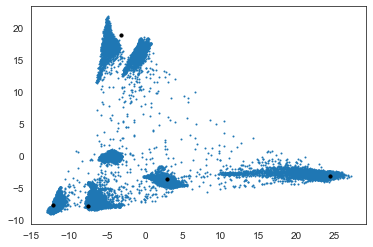

In [11]:
plt.scatter(X_magic.obsm['X_pca'][:,0],X_magic.obsm['X_pca'][:,1], s = 1)
plt.scatter(XC[0], XC[1], color = 'k', s = 10)


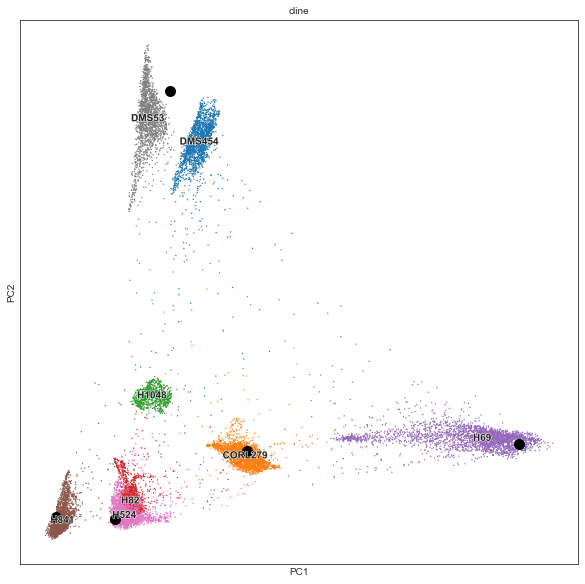

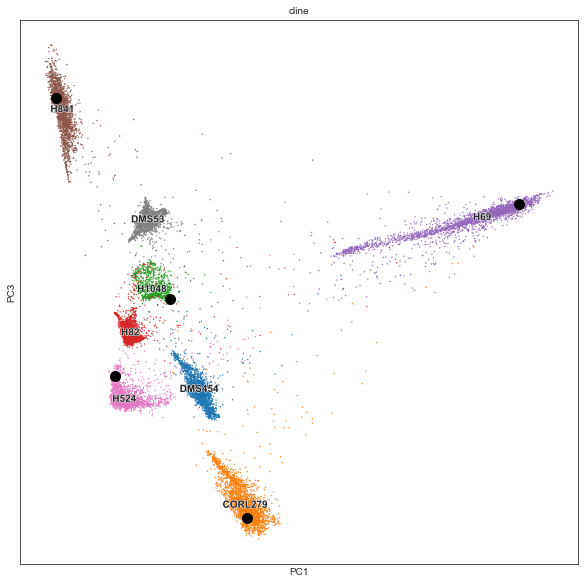

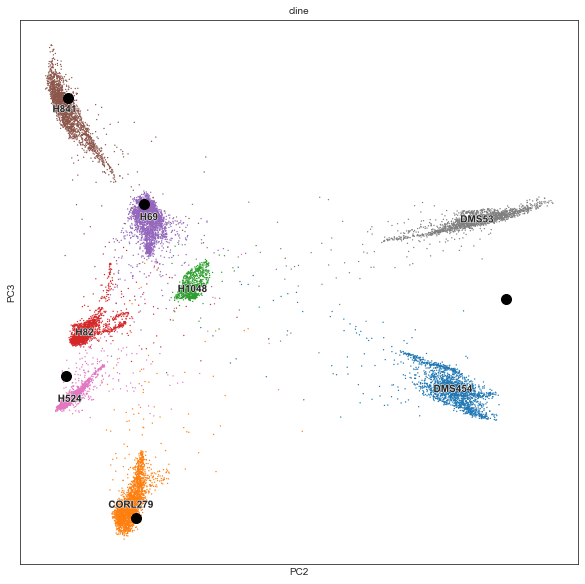

In [12]:
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (10,10), frameon=True)
    comp = components.split(',')
    plt.scatter(XC[int(comp[0])-1], XC[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()


**Conclusions**
When we run a PCA on the magic imputed dataset, over 80% of the variance in explained by just the first 8 components (most likely due to the fact that we have 8 samples). PCHA in the full PCA space (50 components) shows that 5 or 7 archetypes best describe the data. With five archetypes, we get archetypes near H841 (Y), H524 (N), DMS454/53 (A2), H69 (A), and CORL279 (A/N). H1048 and H82 are closer to the middle. We can use the method described in the MAGIC paper (

## Top 8 components of PCA
The top 8 components explain over 81% of the imputed data (and form the elbow of the EV vs PC curve), so we can double check that we get the same results when subsetting to these components. This shouldn't make much difference, but it will make a difference in the distances of cells to archetypes, since volume increases exponentially. The number of data points needed to robustly approximate the polytope also grows exponentially with the dimension.

In [368]:
from py_pcha import PCHA
ev_per_arc = []
for i in range(3,9):
    XC, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'][:,0:8].T, noc=i, delta=0.1)
    ev_per_arc.append(varexpl)
    print(varexpl)


0.45012799116985686
0.5950890966630982
0.7261464606593422
0.8592715036335936
0.9121236439413685
0.9783212152502173


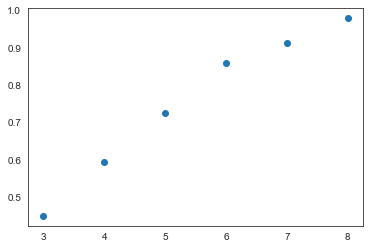

In [369]:
plt.scatter(x = [3,4,5,6,7,8], y = ev_per_arc)

In [371]:
print("Knee in EV vs k plot for different k_max:")
for kmax in range(7,9):
    print('k_max =', kmax)
    find_knee(ev_per_arc, kmax=kmax)

Knee in EV vs k plot for different k_max:
k_max = 7
K* = 6 archetypes, distance between k* and line:  0.06
k_max = 8
K* = 6 archetypes, distance between k* and line:  0.09


**It looks like 5 or 6 archetypes still fit the data well.** We'll calculate the archetype locations in the top 8 dimensions, and then use the PC coefficient matrix to estimate the archetypes on the original phenotypic space.

In [377]:
XC, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'][:,0:8].T, noc=5, delta=0.1)


In [378]:
XC = np.array(XC)

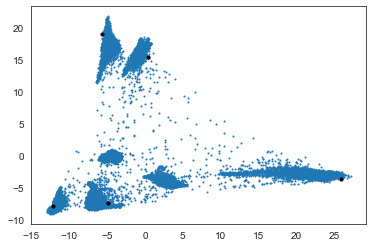

In [379]:
plt.scatter(X_magic.obsm['X_pca'][:,0],X_magic.obsm['X_pca'][:,1], s = 1)
plt.scatter(XC[0], XC[1], color = 'k', s = 10)


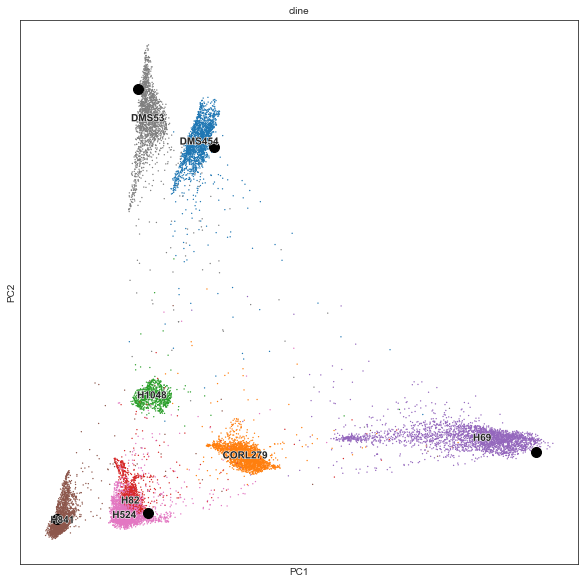

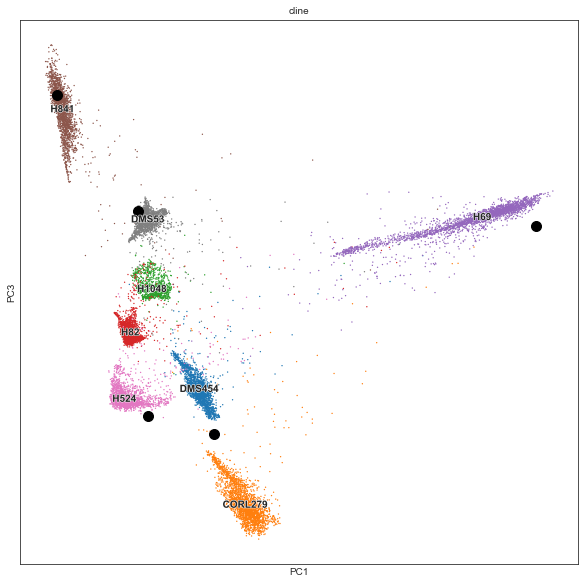

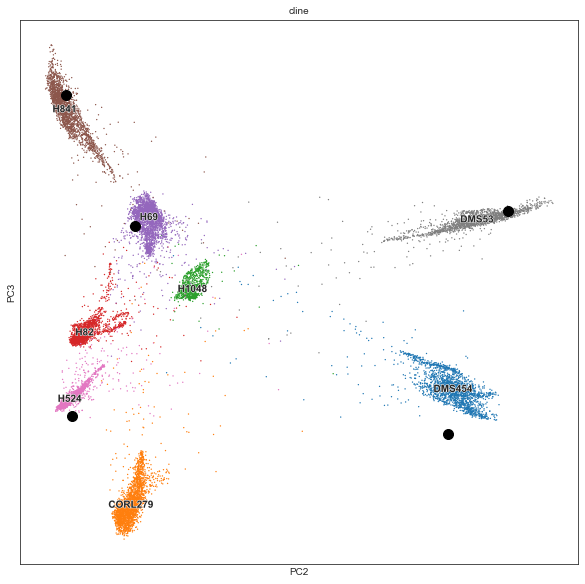

In [380]:
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (10,10), frameon=True)
    comp = components.split(',')
    plt.scatter(XC[int(comp[0])-1], XC[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()


In [381]:
XC_df = pd.DataFrame(XC)

In [382]:
XC_df.columns = ['Arc_1','Arc_2','Arc_3','Arc_4','Arc_5']


In [383]:
X_magic_pca_df = pd.DataFrame(X_magic.obsm['X_pca'], index = X_magic.obs_names)

In [384]:
X_magic_full_df = X_magic_pca_df.append(XC_df.T)

In [385]:
pdx = squareform(pdist(X_magic_full_df, metric='euclidean')) # compute distances on pca


In [386]:
pdx_df = pd.DataFrame(pdx, index=X_magic_full_df.index, columns=X_magic_full_df.index)

In [287]:
pdx_df

,2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454,2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454,2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454,2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454,2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454,2637-SM-1-GCCAAT_S1:AAAACTCGACCCTAACCx-DMS454,2637-SM-1-GCCAAT_S1:AAAACCTCCCCGCAACTx-DMS454,2637-SM-1-GCCAAT_S1:AAAACCTCCACCACGCTx-DMS454,2637-SM-1-GCCAAT_S1:AAAACTCGAATACTCTTx-DMS454,2637-SM-1-GCCAAT_S1:AAAAGTCGGAATTCCCAx-DMS454,...,2639-SM-2-CTTGTA_S2:TTTGTGTCGGCCCTTAx-DMS53,2639-SM-2-CTTGTA_S2:TTTGTGTCCACAAGGCx-DMS53,2639-SM-2-CTTGTA_S2:TTTGTGTCCTGTTCTTx-DMS53,2639-SM-2-CTTGTA_S2:TTTGTGTCCCCATCTGx-DMS53,2639-SM-2-CTTGTA_S2:TTTGTGTCCAGTTTGCx-DMS53,Arc_1,Arc_2,Arc_3,Arc_4,Arc_5
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454,0.000000,8.479208,2.460168,4.675767,8.157543,7.049028,7.808493,8.021279,3.601409,7.965832,...,30.204302,29.482397,30.859122,29.702042,31.492387,30.998952,35.428609,15.299022,36.596009,31.108731
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454,8.479208,0.000000,8.181118,8.172368,8.865271,5.743278,7.111530,7.545442,10.480492,7.293504,...,31.301782,31.166539,32.118798,27.984079,33.482298,30.461302,34.167378,17.350574,36.748911,30.064402
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454,2.460168,8.181118,0.000000,4.707225,7.672469,6.314170,6.924339,8.319640,4.012982,8.207993,...,31.449381,30.809030,32.119228,30.814219,32.783800,31.948346,36.238048,16.447932,37.591329,32.011406
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454,4.675767,8.172368,4.707225,0.000000,6.919560,4.262172,5.064502,10.524371,6.394869,10.150986,...,31.404246,31.179238,32.523913,31.592348,33.108838,31.656369,35.873455,16.845169,36.921961,31.354673
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454,8.157543,8.865271,7.672469,6.919560,0.000000,7.223392,8.797741,10.456697,7.773913,9.011444,...,29.509625,29.970027,31.234616,29.968897,32.131906,30.217128,34.769965,15.793620,35.503364,30.512547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Arc_1,30.998952,30.461302,31.948346,31.656369,30.217128,32.342917,34.188985,30.784332,29.820225,29.780258,...,32.124736,31.510209,33.501690,31.671529,34.314181,0.000000,29.447462,29.624537,35.583564,28.739925
Arc_2,35.428609,34.167378,36.238048,35.873455,34.769965,36.164144,37.606515,34.775158,35.023311,33.998357,...,35.373013,35.193102,36.397967,33.381795,37.628241,29.447462,0.000000,33.391177,39.798248,33.909022
Arc_3,15.299022,17.350574,16.447932,16.845169,15.793620,17.847028,19.047460,16.170632,15.112321,15.550340,...,15.351898,15.099406,16.156640,17.876959,17.000704,29.624537,33.391177,0.000000,35.986812,31.188450
Arc_4,36.596009,36.748911,37.591329,36.921961,35.503364,37.296260,38.328554,37.219256,36.568507,36.439353,...,38.389354,38.792988,39.877512,39.080987,40.664904,35.583564,39.798248,35.986812,0.000000,34.257102


# PCHA on MAGIC imputed data after scanorama

I also want to try applying MAGIC to the batch corrected data to see if it gives us a different result. If not, we will probably stick with the un-batch-corrected data to change the data as little as possible.

In [88]:
sc.pp.filter_genes(adata_SC, min_cells=3)
magic_operator_scan = magic.MAGIC(solver='approximate')
X_magic_scanorama = magic_operator_scan.fit_transform(adata_SC)

Calculating MAGIC...
  Running MAGIC on 16108 cells and 20596 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 92.65 seconds.
    Calculating KNN search...
    Calculated KNN search in 31.19 seconds.
    Calculating affinities...
    Calculated affinities in 32.66 seconds.
  Calculated graph and diffusion operator in 156.52 seconds.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 159.63 seconds.


In [90]:
sc.pp.pca(X_magic_scanorama)

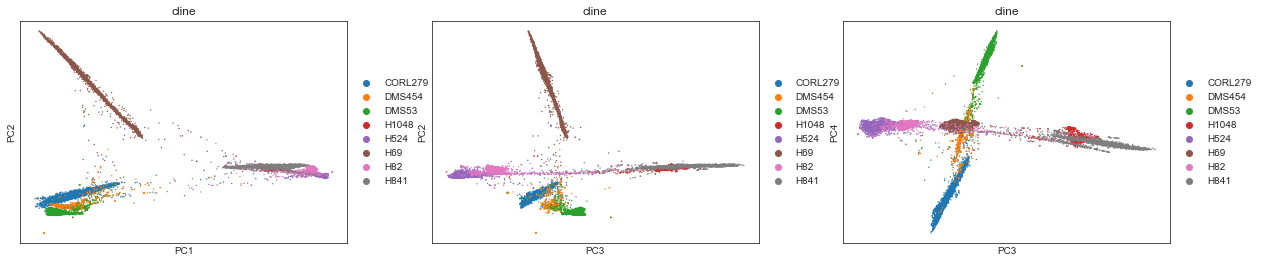

In [99]:
sc.pl.pca(X_magic_scanorama, color='cline', components=['1,2', '3,2', '3,4'])

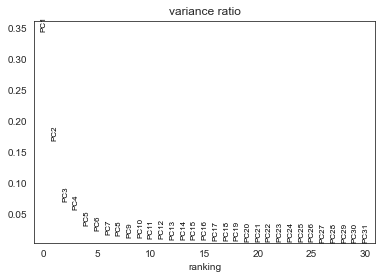

In [101]:
sc.pl.pca_variance_ratio(X_magic_scanorama)

In [328]:
pca_var = X_magic_scanorama.uns['pca']['variance_ratio']

tot_exp_var = 0
n = 0
for i in pca_var:
    n +=1
    tot_exp_var += i
    if tot_exp_var > .8: 
        print(n)
        break

16


In this dataset, we need slightly more PCs to reach the same level of explained variance.

In [258]:
from py_pcha import PCHA
ev_per_arc_scanorama = []
for i in range(3,11):
    XC_scanorama, S, C, SSE, varexpl = PCHA(X_magic_scanorama.obsm['X_pca'].T, noc=i, delta=0.1)
    ev_per_arc_scanorama.append(varexpl)
    print(varexpl)


0.5428142052548183
0.6176503700077693
0.6751476268207562
0.7067787178969578
0.7330320605987336
0.7453987005474049
0.7627042711954788
0.7701245679722134


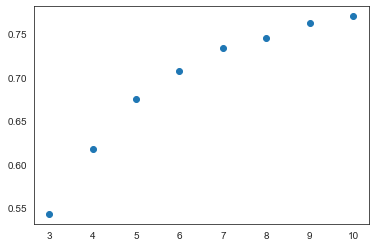

In [259]:
plt.scatter(x = [3,4,5,6,7,8,9,10], y = ev_per_arc_scanorama)

In [260]:
for kmax in range(8,11):
    print('k_max =', kmax)
    find_knee(ev_per_arc_scanorama, kmax=kmax)

k_max = 8
K* = 5 archetypes, distance between k* and line:  0.05
k_max = 9
K* = 5 archetypes, distance between k* and line:  0.06
k_max = 10
K* = 5 archetypes, distance between k* and line:  0.07


In [261]:
XC_scanorama, S, C, SSE, varexpl = PCHA(X_magic_scanorama.obsm['X_pca'].T, noc=5, delta=0.1)


In [262]:
XC_scanorama = np.array(XC_scanorama)

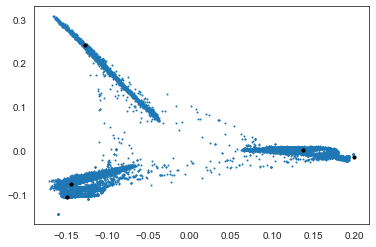

In [264]:
plt.scatter(X_magic_scanorama.obsm['X_pca'][:,0],X_magic_scanorama.obsm['X_pca'][:,1], s = 1)
plt.scatter(XC_scanorama[0], XC_scanorama[1], color = 'k', s = 10)


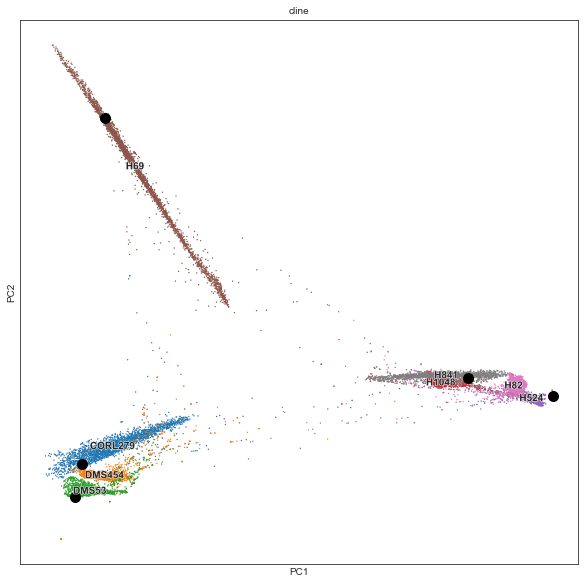

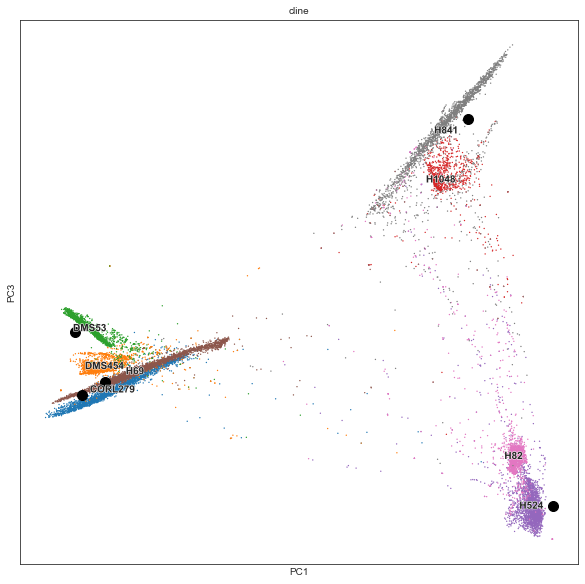

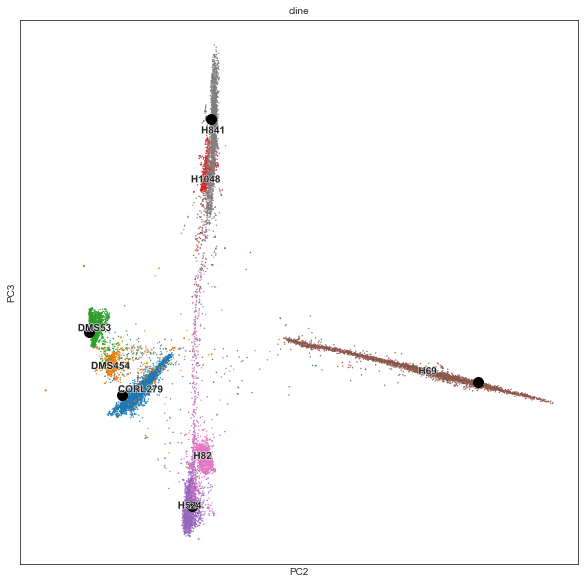

In [265]:
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic_scanorama, color = 'cline', components=components, show=False, figsize= (10,10), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_scanorama[int(comp[0])-1], XC_scanorama[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()


## Cell cycle regression followed by MAGIC-- alternative to above code block

calculating cell cycle phase


... storing 'phase' as categorical


-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


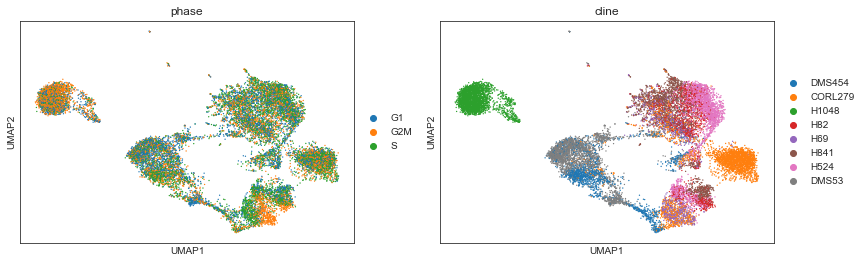

In [20]:
# dropkick recipe already scores cell cycle genes
sc.pl.umap(adata, color=['phase','cline'])

In [21]:
# sc.pp.regress_out(adata, ['S_score', 'G2M_score'])
# sc.pp.scale(adata)

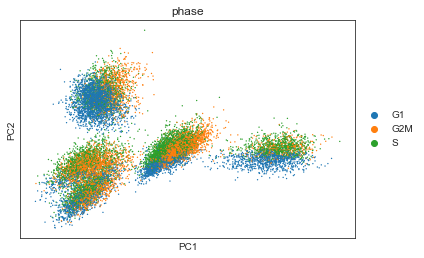

In [8]:
# sc.tl.pca(adata)
# sc.pl.pca_scatter(adata, color='phase')

In [24]:
sc.pp.neighbors(adata, random_state=0)
sc.tl.leiden(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


# Projection of Single Cell Data into Bulk PCA

In [35]:
from sklearn import preprocessing as pp
from sklearn.decomposition import PCA
sc_pc_genes = sorted(list(set(adata.var_names).intersection(pc_loadings.index)))
sc_pc_loadings = pc_loadings.loc[sc_pc_genes]
sc_arc_genes = arc.loc[sc_pc_genes]
sc_arc_genes = sc_arc_genes / np.linalg.norm(sc_arc_genes, axis=0)

pca = PCA(n_components=4)
sc_arc_genes_pc = pca.fit_transform(sc_arc_genes.T)

loadings = pd.DataFrame(pca.components_.T,index=sc_pc_genes)

sc_data = data[sc_pc_genes]
adata_df = pd.DataFrame(adata.X.todense(), index=adata.obs_names, columns=adata.var_names)
adata_df = adata_df[sc_pc_genes]
adata_df = adata_df.T
adata_df_scale = adata_df / np.linalg.norm(adata_df, axis=0)
# pd.DataFrame(pp.scale(adata_df.T), columns = sc_pc_genes).T
adata_arc = loadings.T.dot(adata_df_scale)


In [36]:
sc_arc_genes_pc = pd.DataFrame(sc_arc_genes_pc.T)

In [37]:
df['cluster2'] = [str(i) for i in df['cluster2']]

In [38]:
all_df = (pd.DataFrame(columns=['cluster'], index = adata_arc.columns))
all_df['cluster'] = df['cluster2']

In [39]:
all_df = all_df.fillna('Specialist')

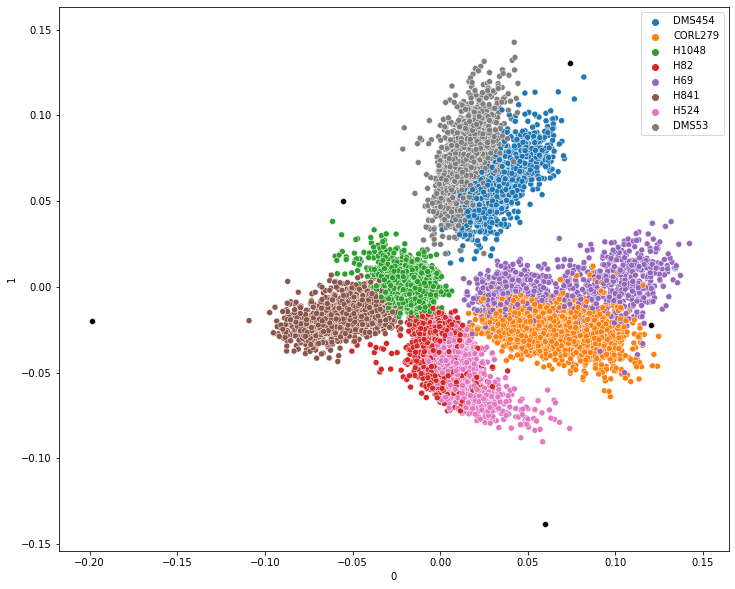

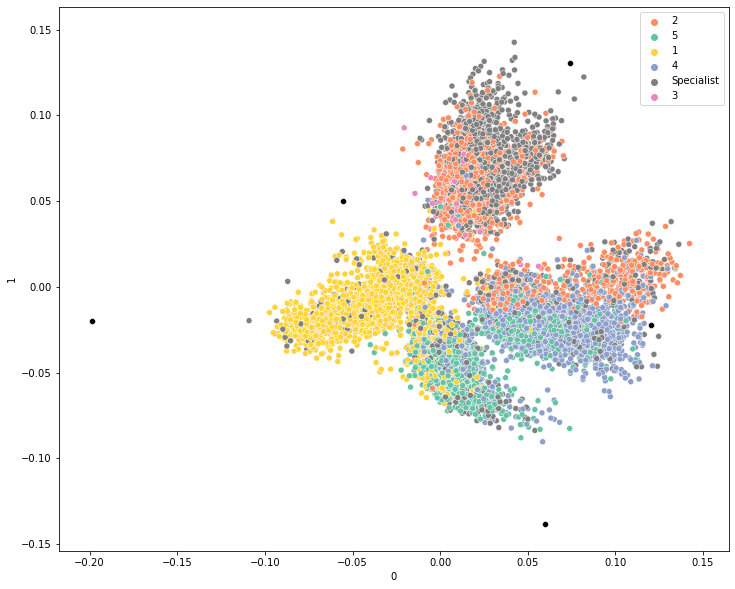

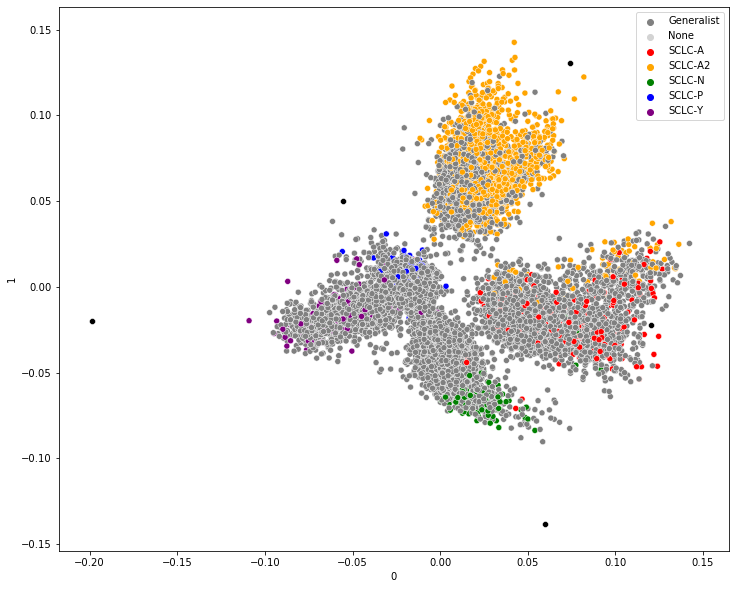

In [42]:
plt.figure(figsize = (12,10))
sns.scatterplot(-adata_arc.loc[pcs_to_plot[0]],-adata_arc.loc[pcs_to_plot[1]], hue =  adata.obs['cline'])#adata.obs['cline'].values)
sns.scatterplot(-sc_arc_genes_pc.loc[pcs_to_plot[0]],-sc_arc_genes_pc.loc[pcs_to_plot[1]], color = 'black')

plt.figure(figsize = (12,10))
sns.scatterplot(-adata_arc.loc[pcs_to_plot[0]],-adata_arc.loc[pcs_to_plot[1]], hue =  all_df['cluster'], 
                palette = [cp[0],cp[1],cp[2],cp[3],'grey',cp[4]])#adata.obs['cline'].values)
sns.scatterplot(-sc_arc_genes_pc.loc[pcs_to_plot[0]],-sc_arc_genes_pc.loc[pcs_to_plot[1]], color = 'black')


plt.show()
plt.figure(figsize = (12,10))
sns.scatterplot(-adata_arc.loc[pcs_to_plot[0]],-adata_arc.loc[pcs_to_plot[1]], hue =  adata.obs['Phenotype'].values,
               palette = ['grey','lightgrey','red','orange','green','blue','purple'])#
sns.scatterplot(-sc_arc_genes_pc.loc[pcs_to_plot[0]],-sc_arc_genes_pc.loc[pcs_to_plot[1]], color = 'black')


In [47]:
adata.write_h5ad('../int/clines/adata06.h5ad')

In [40]:
mb.pp.magic_recipe(adata,tfs, 'Phenotype_filtered', fname='cline')


Calculating MAGIC...
  Running MAGIC on 16671 cells and 18265 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 9.77 seconds.
    Calculating KNN search...
    Calculated KNN search in 5.19 seconds.
    Calculating affinities...
    Calculated affinities in 5.23 seconds.
  Calculated graph and diffusion operator in 20.22 seconds.
  Calculating imputation...
  Calculated imputation in 0.13 seconds.
Calculated MAGIC in 23.50 seconds.
Calculating PCA...
Calculated PCA in 9.85 seconds.
Calculating imputation...
Calculated imputation in 0.10 seconds.


In [ ]:
fname = 'cline_nomagic'
clusters = 'Phenotype_filtered'
genes = sorted(list(set(tfs).intersection(set(adata.var_names))))
adata.layers['t0'] = adata.layers['Ms']
adata.layers['t1'] = scv.utils.get_extrapolated_state(adata)

t0 = pd.DataFrame(adata[:, genes].layers['t0'], index=adata.obs_names, columns=genes)
t0.to_csv(f'./out/t0_{fname}.csv')
print(t0.head())
t1 = pd.DataFrame(adata[:, genes].layers['t1'], index=adata.obs_names, columns=genes)
t1.to_csv(f'./out/t1_{fname}.csv')
print(t1.head())
network_clusters = pd.DataFrame(adata.obs[clusters])
network_clusters.to_csv(f'./out/{fname}_clusters.csv')
